In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder


In [6]:
data=pd.read_csv("Book1.csv")

In [7]:
data.drop(columns=["product"],inplace=True)

In [8]:
data.head()

,type,second_type,kernel perecentage,size,close shell precent,price
0,AA,Open_shell,55.9,30.8,13.0,7.83
1,AA,Close_shell,46.1,33.4,100.0,6.84
2,FA,Open_shell,54.6,34.2,31.9,7.28
3,FA,Open_shell,50.6,34.4,26.9,7.54
4,FA,Other,30.5,38.1,66.7,3.16


In [9]:
data.isnull().sum()

type                   0
second_type            0
kernel perecentage     0
size                   0
close shell precent    0
price                  0
dtype: int64

In [10]:
data.describe()

,kernel perecentage,size,close shell precent,price
count,63.000000,63.000000,63.000000,63.000000
mean,45.680476,32.177143,75.823810,6.583492
std,6.220856,3.186027,38.795667,1.207334
min,21.300000,24.800000,0.000000,1.850000
25%,44.640000,29.850000,59.150000,6.040000
50%,46.350000,32.200000,100.000000,6.800000
75%,48.225000,34.100000,100.000000,7.235000
max,55.900000,40.500000,100.000000,9.080000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 63 non-null     object 
 1   second_type          63 non-null     object 
 2   kernel perecentage   63 non-null     float64
 3   size                 63 non-null     float64
 4   close shell precent  63 non-null     float64
 5   price                63 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.1+ KB


In [12]:
# First: convert 'price' to numeric safely
data['price'] = pd.to_numeric(data['price'], errors='coerce')  # coerce invalid values to NaN

# Then: create dummy variables for the categorical features
data_dummies = pd.get_dummies(data, columns=['type', 'second_type'], prefix=['type', 'second_type'],drop_first=True)


In [13]:
data_dummies.head()

,kernel perecentage,size,close shell precent,price,type_FA,second_type_Open_shell,second_type_Other
0,55.9,30.8,13.0,7.83,0,1,0
1,46.1,33.4,100.0,6.84,0,0,0
2,54.6,34.2,31.9,7.28,1,1,0
3,50.6,34.4,26.9,7.54,1,1,0
4,30.5,38.1,66.7,3.16,1,0,1


In [14]:
feature_names = data_dummies.drop(columns=['price']).columns
features = data_dummies.drop(columns=['price'])
label = data_dummies['price']

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features)

In [16]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)
train_data = pd.DataFrame(train_data, columns=feature_names)
test_data = pd.DataFrame(test_data, columns=feature_names)

In [17]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
def compare_models(model):
    model_name = model.__class__.__name__
    fit = model.fit(train_data, train_labels)
    y_pred = fit.predict(test_data)
    r2 = r2_score(test_labels, y_pred)
    rmse = mean_squared_error(test_labels, y_pred, squared=False)  
    mae = mean_absolute_error(test_labels, y_pred)
    mape = mean_absolute_percentage_error(test_labels, y_pred)
    return f"Model: {model_name}\nR²: {r2:.4f}\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}\nMAPE: {mape:.4f}"

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=42),
    RandomForestRegressor(n_estimators=200, max_depth=3, random_state=42),
    LinearRegression(),
    svm.SVR(),
   DecisionTreeRegressor()
]

In [145]:
model_train = list(map(compare_models, models))
print(*model_train, sep="\n")

Model: GradientBoostingRegressor
R²: 0.8462
RMSE: 0.4681
MAE: 0.3878
MAPE: 0.0610
Model: RandomForestRegressor
R²: 0.8368
RMSE: 0.4822
MAE: 0.3807
MAPE: 0.0636
Model: LinearRegression
R²: 0.7234
RMSE: 0.6279
MAE: 0.5319
MAPE: 0.0840
Model: SVR
R²: 0.6979
RMSE: 0.6562
MAE: 0.4727
MAPE: 0.0864
Model: DecisionTreeRegressor
R²: 0.6157
RMSE: 0.7402
MAE: 0.5395
MAPE: 0.0847


In [19]:
def show_feature_importance(model, feature_names):
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importance
        }).sort_values(by='Importance', ascending=False)

        print(f"\n📊 Feature Importance for {model.__class__.__name__}")
        print(importance_df)

        # Optional: plot
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 6))
        plt.barh(importance_df['Feature'], importance_df['Importance'])
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.title(f"Feature Importance - {model.__class__.__name__}")
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()


In [20]:
def show_coefficients(model, feature_names):
    if hasattr(model, "coef_"):
        coefs = model.coef_
        coef_df = pd.DataFrame({
            'Feature': feature_names,
            'Coefficient': coefs if len(coefs.shape) == 1 else coefs[0]
        }).sort_values(by='Coefficient', key=abs, ascending=False)

        print(f"\n📈 Coefficients for {model.__class__.__name__}")
        print(coef_df)



🔍 Model: GradientBoostingRegressor

📊 Feature Importance for GradientBoostingRegressor
                  Feature  Importance
0      kernel perecentage    0.682482
2     close shell precent    0.203980
1                    size    0.055491
4  second_type_Open_shell    0.041973
3                 type_FA    0.016067
5       second_type_Other    0.000008


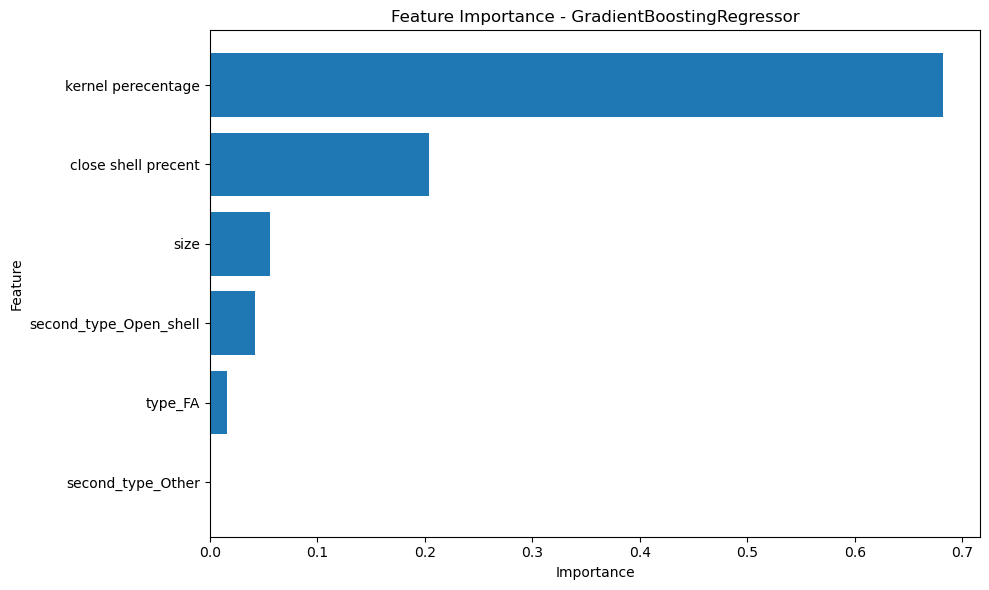


🔍 Model: RandomForestRegressor

📊 Feature Importance for RandomForestRegressor
                  Feature  Importance
0      kernel perecentage    0.492690
1                    size    0.223048
2     close shell precent    0.186567
4  second_type_Open_shell    0.086220
5       second_type_Other    0.006103
3                 type_FA    0.005372


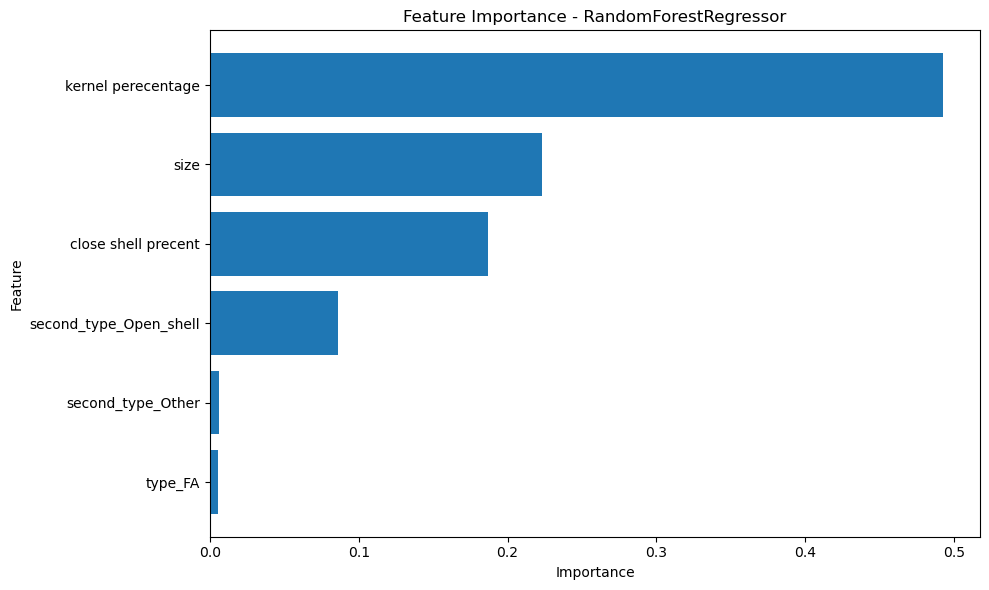


🔍 Model: LinearRegression

📈 Coefficients for LinearRegression
                  Feature  Coefficient
0      kernel perecentage     3.240707
4  second_type_Open_shell     1.967728
2     close shell precent     1.277329
5       second_type_Other    -0.645771
1                    size    -0.549989
3                 type_FA     0.003440

🔍 Model: SVR

🔍 Model: DecisionTreeRegressor

📊 Feature Importance for DecisionTreeRegressor
                  Feature  Importance
0      kernel perecentage    0.672962
2     close shell precent    0.244606
1                    size    0.066577
3                 type_FA    0.015855
4  second_type_Open_shell    0.000000
5       second_type_Other    0.000000


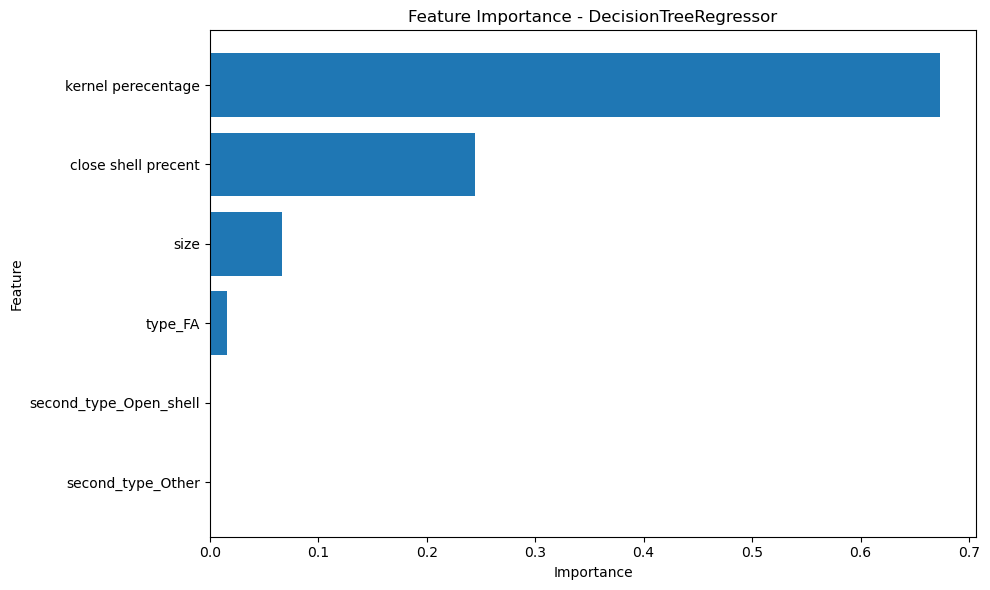

In [21]:
feature_names = train_data.columns
for model in models:
    print(f"\n🔍 Model: {model.__class__.__name__}")
    fit = model.fit(train_data, train_labels)
    show_feature_importance(fit, train_data.columns)
    show_coefficients(fit, train_data.columns)

In [22]:
# Track best model by R² score
best_model = None
best_score = -np.inf  # start with lowest possible R²
best_model_name = ""

for model in models:
    model_name = model.__class__.__name__
    fit = model.fit(train_data, train_labels)
    y_pred = fit.predict(test_data)
    r2 = r2_score(test_labels, y_pred)

    print(f"Model: {model_name}, R²: {r2:.4f}")

    if r2 > best_score:
        best_score = r2
        best_model = fit  # trained model
        best_model_name = model_name

print(f"\n✅ Best model: {best_model_name} with R² = {best_score:.4f}")


Model: GradientBoostingRegressor, R²: 0.8462
Model: RandomForestRegressor, R²: 0.8368
Model: LinearRegression, R²: 0.7234
Model: SVR, R²: 0.6979
Model: DecisionTreeRegressor, R²: 0.6553

✅ Best model: GradientBoostingRegressor with R² = 0.8462


In [23]:
new_data = pd.DataFrame([{
    "kernel perecentage": 48.0,
    "size": 22.1,
    "close shell precent": 93.0,
    "type": "Fandoghi",
    "second_type": "Closed Shell"
}])


In [24]:
# Encode
new_data_dummies = pd.get_dummies(new_data, columns=['type', 'second_type'], prefix=['type', 'second_type'])

# Add missing dummy columns
for col in feature_names:
    if col not in new_data_dummies:
        new_data_dummies[col] = 0
new_data_dummies = new_data_dummies[feature_names]

# Scale
new_data_scaled = scaler.transform(new_data_dummies)

# Predict
forecast_price = best_model.predict(new_data_scaled)
print("💰 Forecasted Price: {:.2f}".format(forecast_price[0]),"$")




💰 Forecasted Price: 6.86 $


C:\Users\Siaconda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
